In [1]:
#Library Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv",index_col="Unnamed: 0")
df.head(5)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 6)

# Data Cleaning 

In [4]:
#Observe that in Production (Tons) we have two decimals ,which is not possible in single numbers 
# ,so remove the decimals (because they are stored as text with periods . for thousands )
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")

In [5]:
# GIven :  commas , for decimals:
# So replace the (,)with . in all the columns. and remove the (.)
df["Production per Person (Kg)"] =  df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")


In [6]:
# Similarly for other columns
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".",'')
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".",'').str.replace(",",'.')

In [7]:
df.head(5)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
# as WE can Observe that the Columns name having some spaces in between lets remove it
df.rename(columns={"Production (Tons)" : "Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)" : "Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)" : "Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)" : "Yield(Kg / Hectare)"},inplace=True)

In [9]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
# Lets Check For The Null Values
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [11]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df=df.dropna().reset_index()

In [13]:
df.head()

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
# AFter Reseting the Index We get new column nameed as index 
# so drop it
df.drop("index",inplace=True,axis=1)

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
# lets Check the datatypes
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [17]:
# converting the values objects to float
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg / Hectare)"]=df["Yield(Kg / Hectare)"].astype(float)

In [18]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

In [19]:
# checking for unique Values..
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

# Univariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How Many Countries Produce Sugarcane From Each Continent?


In [21]:
df["Continent"].value_counts()
# I will get how many countries from one continent take part in production of sugarcane

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

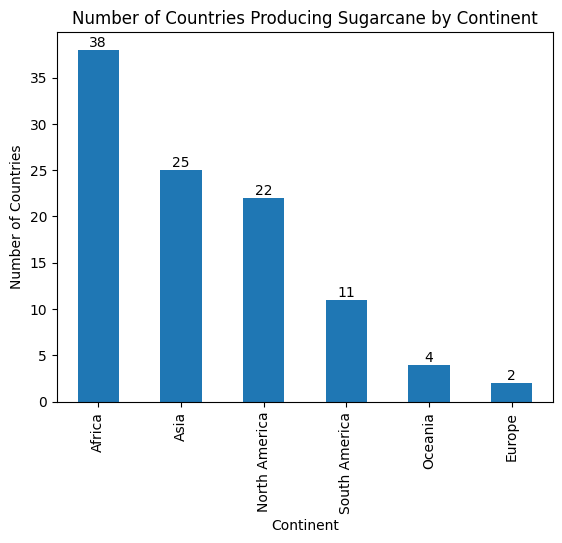

In [22]:
ax = df["Continent"].value_counts().plot(kind='bar', 
                                         label='No. of Countries Takes Part in Sugarcane Production')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.ylabel('Number of Countries')
plt.xlabel('Continent')
plt.title('Number of Countries Producing Sugarcane by Continent')
plt.show()

# DIstribution of Columns

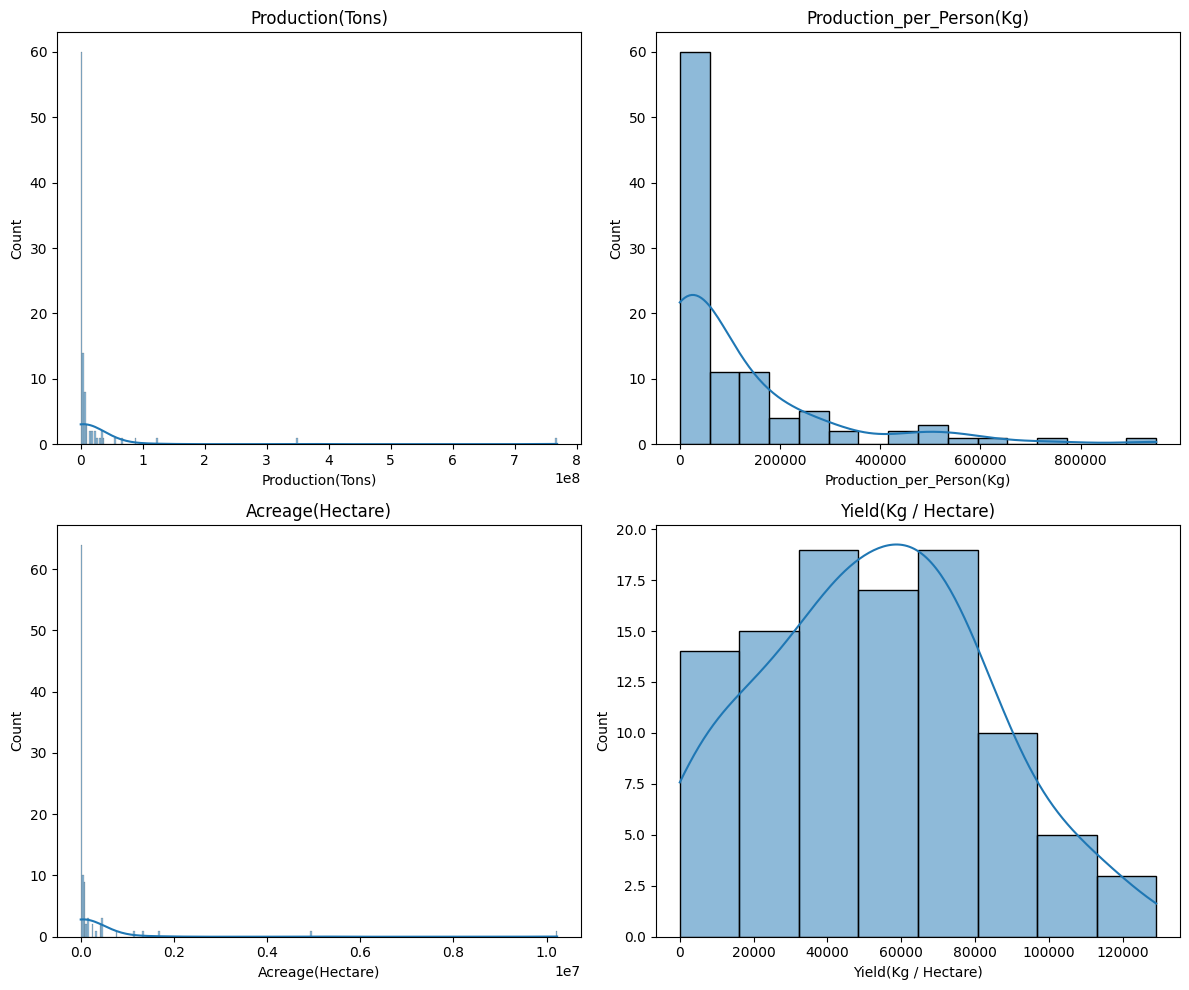

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Production(Tons)"], ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Production(Tons)")

sns.histplot(df["Production_per_Person(Kg)"], ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Production_per_Person(Kg)")

sns.histplot(df["Acreage(Hectare)"], ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Acreage(Hectare)")

sns.histplot(df["Yield(Kg / Hectare)"], ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Yield(Kg / Hectare)")

plt.tight_layout()
plt.show()

 # Checking Outliers

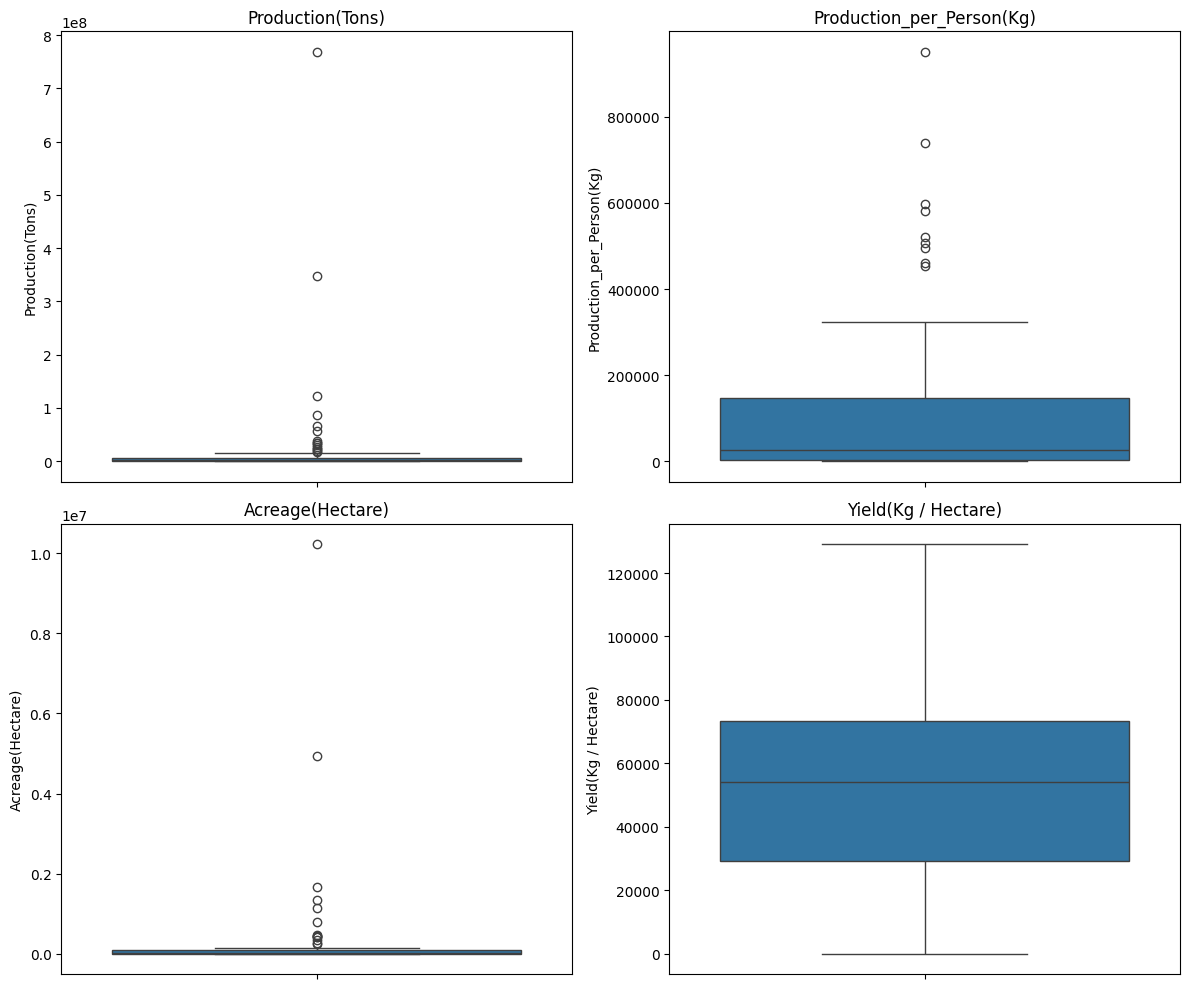

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(y=df["Production(Tons)"], ax=axes[0, 0])
axes[0, 0].set_title("Production(Tons)")

sns.boxplot(y=df["Production_per_Person(Kg)"], ax=axes[0, 1])
axes[0, 1].set_title("Production_per_Person(Kg)")

sns.boxplot(y=df["Acreage(Hectare)"], ax=axes[1, 0])
axes[1, 0].set_title("Acreage(Hectare)")

sns.boxplot(y=df["Yield(Kg / Hectare)"], ax=axes[1, 1])
axes[1, 1].set_title("Yield(Kg / Hectare)")

plt.tight_layout()
plt.show()

# Bivariate Analysis

- # __Country Analysis__

# 1. __Which COuntry produces Maximum Sugarcane?__

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [26]:
new_df=df.loc[:,["Country","Production(Tons)"]].sort_values(by="Production(Tons)",ascending=False)
new_df

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
98,Lebanon,97.0
99,Singapore,50.0
100,Samoa,12.0
88,Saint Lucia,10.0


In [27]:
new_df["Production(Tons)_Percentage"]=(new_df["Production(Tons)"]*100)/sum(new_df["Production(Tons)"])

In [28]:
new_df

,Country,Production(Tons),Production(Tons)_Percentage
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
98,Lebanon,97.0,5.139401e-06
99,Singapore,50.0,2.649176e-06
100,Samoa,12.0,6.358022e-07
88,Saint Lucia,10.0,5.298352e-07


In [29]:
"Max Production Of Sugar Country"
new_df.iloc[0]

Country                             Brazil
Production(Tons)               768678382.0
Production(Tons)_Percentage      40.727285
Name: 0, dtype: object

In [30]:
"Top 5 Maximum Sugar Production Countries"
new_df.head()

,Country,Production(Tons),Production(Tons)_Percentage
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_Percentage'>

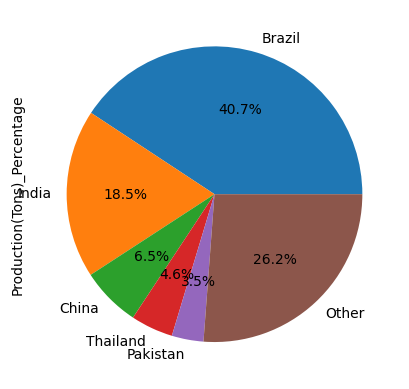

In [31]:
"Top 5 Maximum Sugar Production Countries"
top5=new_df.iloc[0:5]
Other_ProductionTons=sum(new_df.iloc[5:]["Production(Tons)"])
other_Production_Percentage=sum(new_df.iloc[5:]["Production(Tons)_Percentage"])
plot_df=top5.copy()

plot_df.loc[len(plot_df)]=["Other",Other_ProductionTons,other_Production_Percentage]
plot_df

plot_df["Production(Tons)_Percentage"].plot(
    y="Production(Tons)_Percentage",
    kind='pie',
    labels=plot_df["Country"],
    autopct=lambda pct: f"{pct:.1f}%"
)

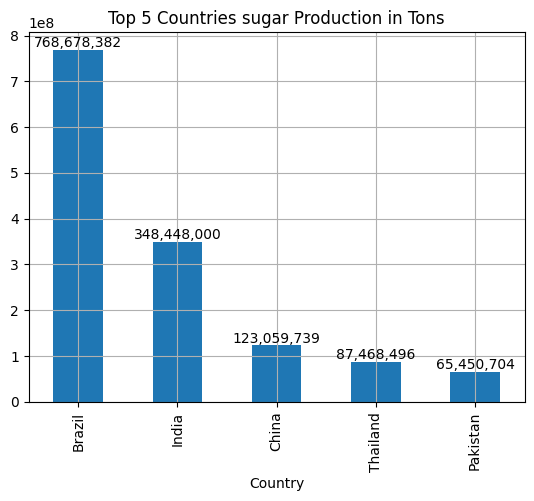

In [32]:
"Top 5 Bar chart Production in Tons"
ax=new_df.set_index("Country")["Production(Tons)"].head(5).plot(
    kind='bar',
    grid=True,
    title="Top 5 Countries sugar Production in Tons"
)


# Add value labels above each bar
for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,  # X position: center of the bar
        height + 0.001 * height,         # Y position: slightly above the bar
        f'{height:,.0f}',               # Format with comma separators
        ha='center', va='bottom'
    )

__USing Seaborn__

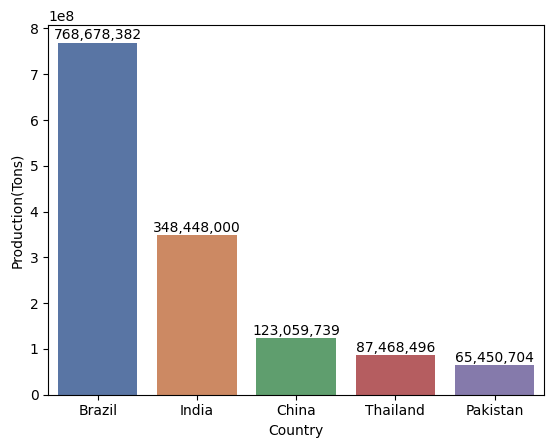

In [33]:
ax=sns.barplot(data=df.head(5),x="Country",y="Production(Tons)",hue="Country",legend=False,palette="deep")

for i in ax.patches:
    height=i.get_height()
    
    ax.text(
        i.get_x() + i.get_width() / 2,  # X position: center of the bar
        height + 0.001 * height,         # Y position: slightly above the bar
        f'{height:,.0f}',               # Format with comma separators
        ha='center', va='bottom'
    )

# 2 __Which Country Has the Highest Land__

In [34]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [35]:
new_df=df.loc[:,["Country","Acreage(Hectare)"]].sort_values(by="Acreage(Hectare)",ascending=False).set_index("Country")
new_df.head(10)

,Acreage(Hectare)
Country,
Brazil,10226205.0
India,4950000.0
China,1675215.0
Thailand,1336575.0
Pakistan,1130820.0
Mexico,781054.0
Indonesia,472693.0
Australia,447204.0
Cuba,442307.0


<Axes: xlabel='Country'>

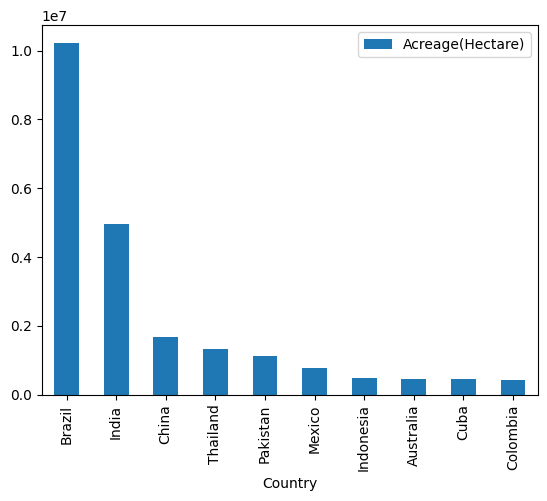

In [36]:
new_df.head(10).plot(kind='bar')

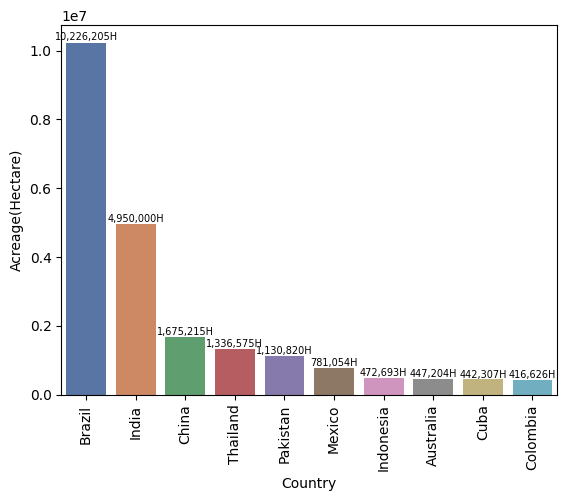

In [37]:
ax=sns.barplot(data=new_df.head(10),x="Country",y="Acreage(Hectare)",hue="Country",legend=False,palette="deep")

for i in ax.patches:
    height=i.get_height()
    
    ax.text(
        i.get_x() + i.get_width() / 2,  # X position: center of the bar
        height + 0.001 * height,         # Y position: slightly above the bar
        f'{height:,.0f}H',               # Format with comma separators
        ha='center', va='bottom',
        fontsize=7
    )
plt.xticks(rotation=90)
plt.show()

# 3 __Which Country has the Highest Yield Per kg hectare(kg/hect)

In [38]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [39]:
new_df=df.loc[:,["Country","Yield(Kg / Hectare)"]].set_index("Country")
new_df

,Yield(Kg / Hectare)
Country,
Brazil,75167.5
India,70393.5
China,73459.1
Thailand,65442.2
Pakistan,57879.0
...,...
Spain,43596.5
Lebanon,28386.4
Singapore,25.0


In [40]:
Req=new_df.sort_values(by="Yield(Kg / Hectare)",ascending=False).head(10)
Req

,Yield(Kg / Hectare)
Country,
Guatemala,129049.3
Senegal,118085.3
Egypt,115030.6
Peru,112120.2
Malawi,107629.5
Chad,102867.1
Zambia,102789.6
Burkina Faso,100526.3
Swaziland,96511.4


<Axes: title={'center': 'Top 10 Countries by Yield(kg/Hect)'}, xlabel='Country'>

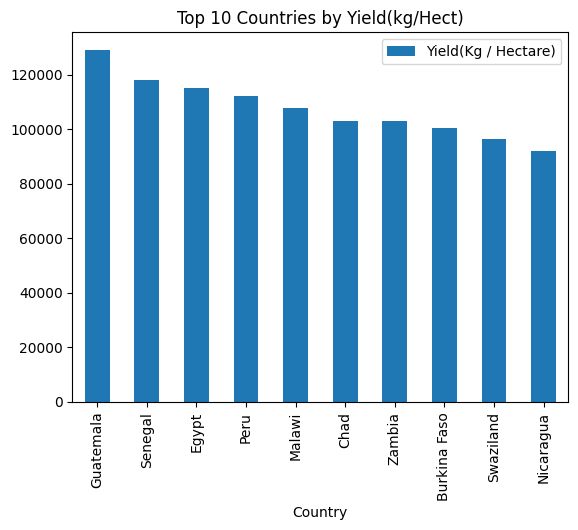

In [41]:
Req.plot(kind='bar',title="Top 10 Countries by Yield(kg/Hect)")

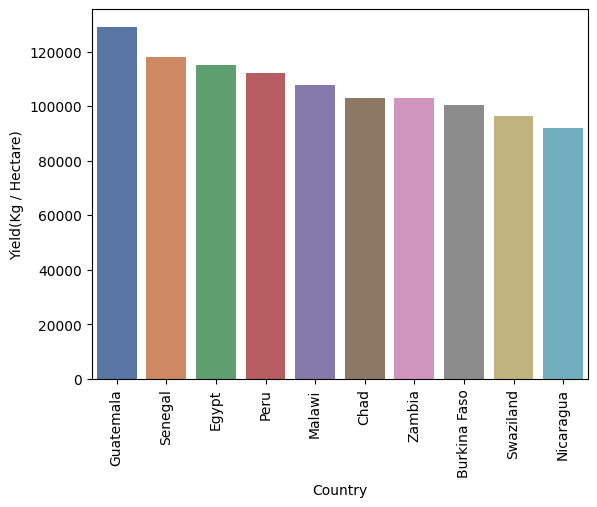

In [42]:
sns.barplot(data=Req,x=Req.index,y="Yield(Kg / Hectare)",
            hue=Req.index,legend=False,palette="deep")
plt.xticks(rotation=90)
plt.show()

# 4 Which Country has the Highest Production per/kg

In [43]:
df.head(2)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5


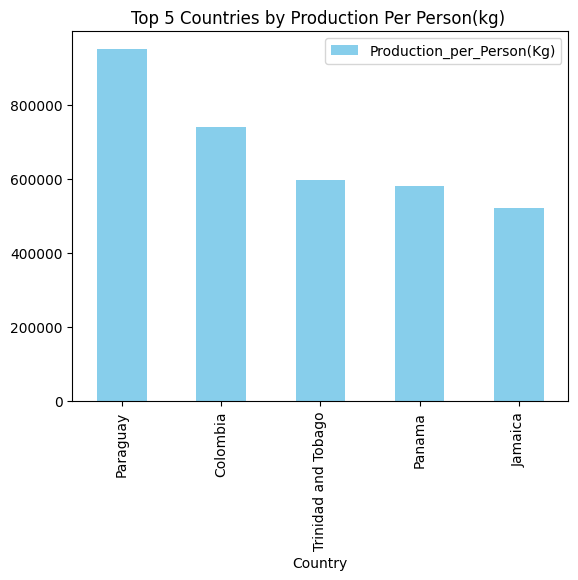

In [44]:
ax=df.loc[:,["Country","Production_per_Person(Kg)"]].set_index("Country").sort_values(by="Production_per_Person(Kg)",ascending=False).head().plot(
    kind='bar',
    title="Top 5 Countries by Production Per Person(kg) ",
    color='skyblue')

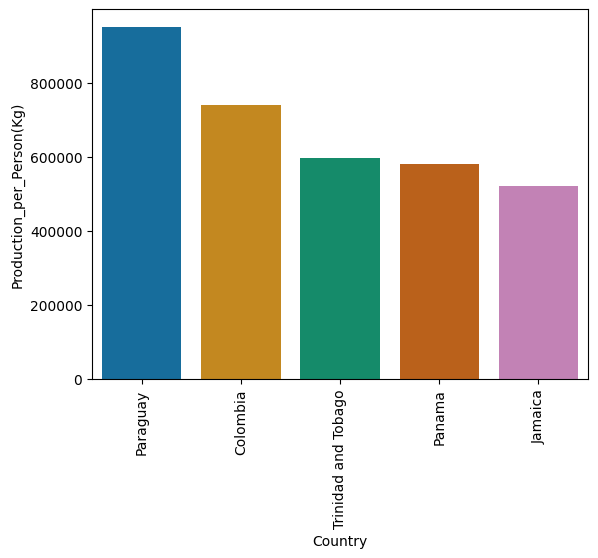

In [45]:
" Using Seaborn"
sns.barplot(data=df.loc[:,["Country","Production_per_Person(Kg)"]].set_index("Country").sort_values(by="Production_per_Person(Kg)",ascending=False).head(),
            x="Country",y="Production_per_Person(Kg)",
            hue='Country',
            legend=False,
            palette='colorblind')

plt.xticks(rotation=90)
plt.show()

# Correlation : 
___to check the things are correlated or not .___

In [46]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [47]:
# select only Number Columns 
new_df=df.select_dtypes(include="number")
# now we can easily use the corr()
new_df.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg / Hectare),0.132812,0.017999,0.113433,1.000000


__From Above Data Summary :__

- Production(Tons) and Acerage(Hectare ) they are Perfectly correlated

- there are other correlations but are not much effective.

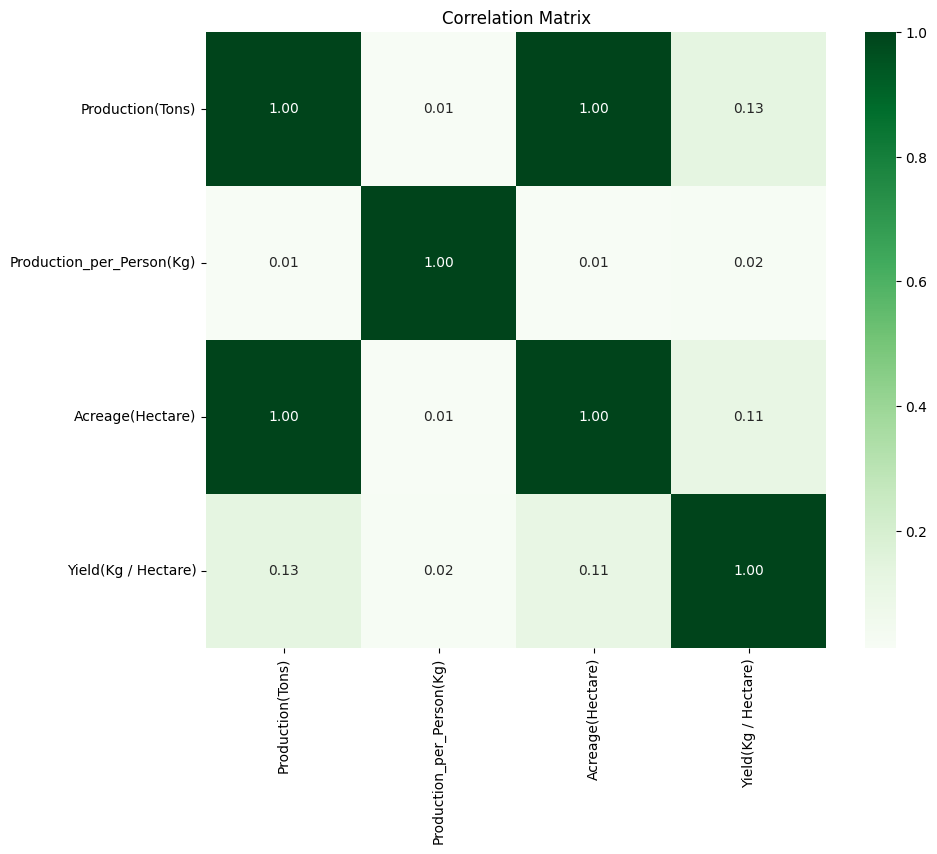

In [48]:

plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()


# Do Countries With Higher Land Produce More Sugar ?

__Yes__

__Why?__

In [49]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

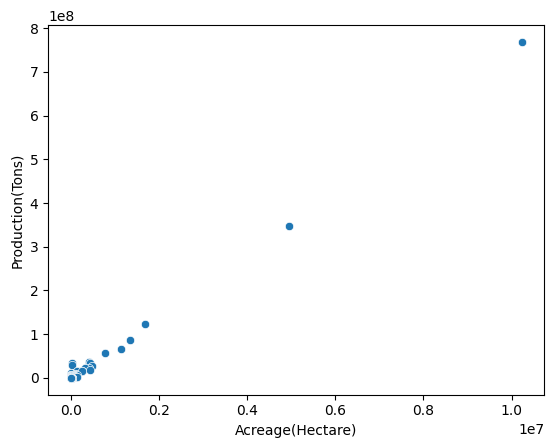

In [50]:
"""From Scatter plot we can see the Perfectly PositiveCorrealtion"""
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

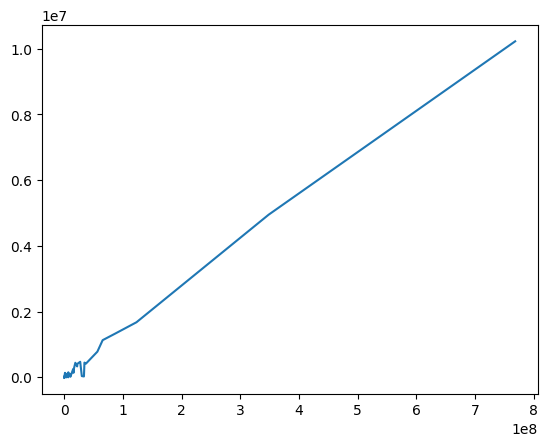

In [51]:
plt.plot(df["Production(Tons)"],df["Acreage(Hectare)"])

# Do Countries which Yeild More Sugar per hectare produces more sugar in total?

__No__

__Why?__

In [52]:
df.head(1)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5


<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

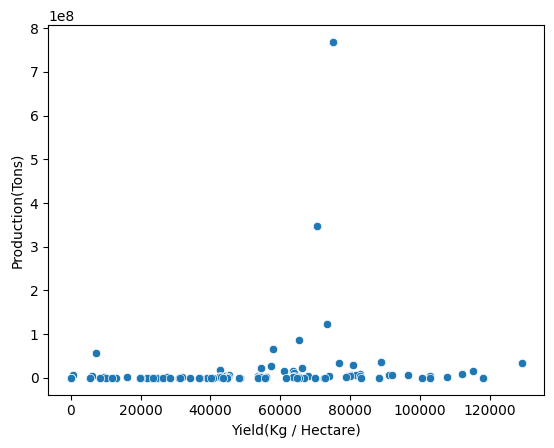

In [53]:
"""No Correaltion between Both"""
sns.scatterplot(data=df,x="Yield(Kg / Hectare)" ,y="Production(Tons)")

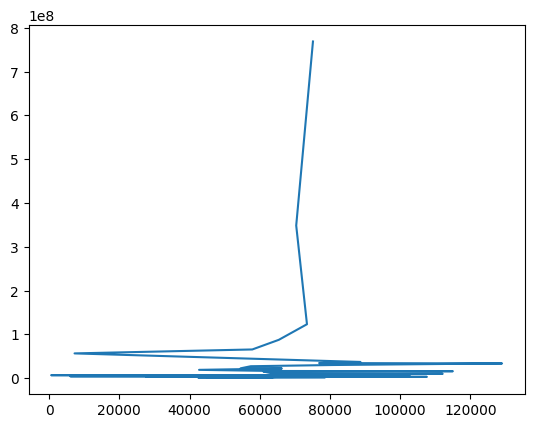

In [54]:
plt.plot(df.head(50)["Yield(Kg / Hectare)"],df.head(50)["Production(Tons)"])

- # __Continent Analysis__

# 1 __Which Continent Produces Maximum Sugar__

In [55]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [56]:
Cont_group=df.groupby("Continent").sum(numeric_only=True)
Cont_group

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [57]:
sorted=Cont_group.sort_values(by="Production(Tons)",ascending=False)
sorted

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7
Asia,721930425.0,1857769.303,10608319.0,1171871.4
North America,173995947.0,3796081.508,1581983.0,1082602.4
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Oceania,36177574.0,28593.605,490909.0,162419.1
Europe,5823.0,536.000,71.0,131870.9


# __Correaltion according to continent__

<Axes: >

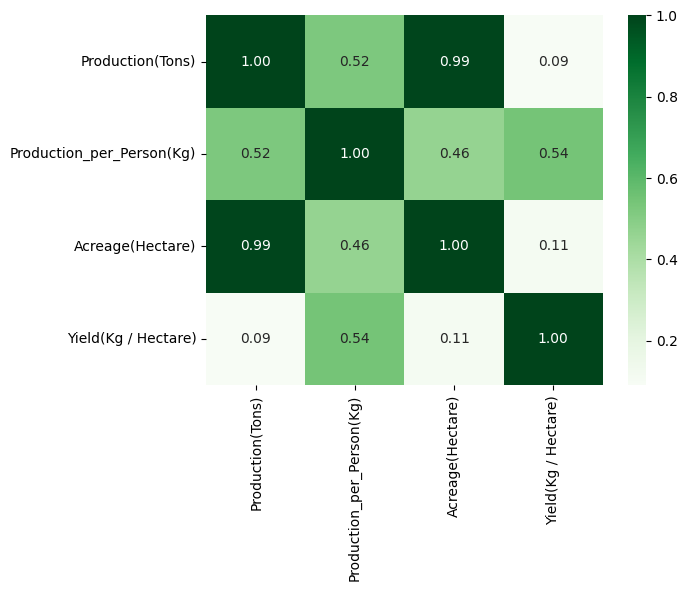

In [58]:
sns.heatmap(sorted.corr(),annot=True,fmt=f".2f",cmap="Greens")

# __PRoduction Distribution By COntinent(pie chart)__

<Axes: ylabel='Production(Tons)'>

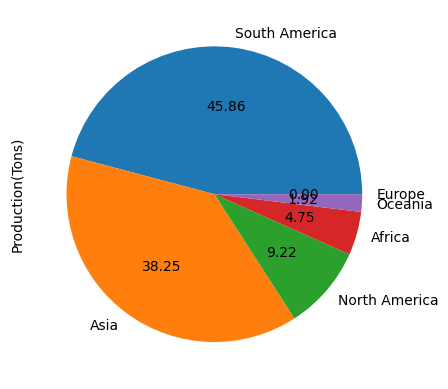

In [59]:

sorted["Production(Tons)"].plot(kind="pie",autopct="%.2f")

In [60]:
"Top 3 Continents Per highest Sugar Production"
sorted.head(3)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7
Asia,721930425.0,1857769.303,10608319.0,1171871.4
North America,173995947.0,3796081.508,1581983.0,1082602.4


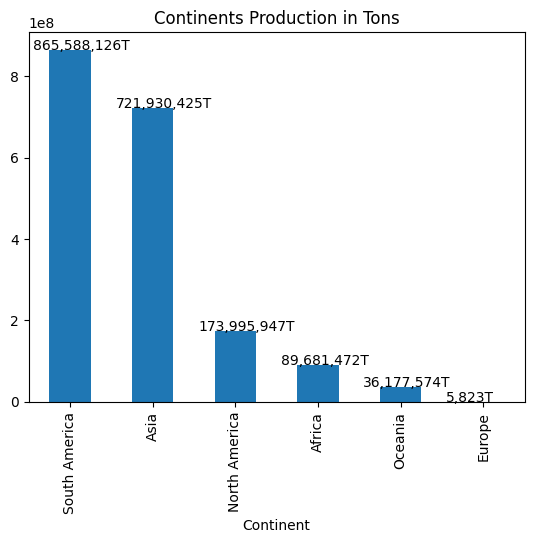

In [61]:
"""Continent plot"""
ax=sorted["Production(Tons)"].plot(kind='bar',title="Continents Production in Tons")


for i in ax.patches:
    height=i.get_height()
    ax.text(
        i.get_x()+i.get_width()//2-0.2,
        height +0.001*height,
        f"{height:,.0f}T",
        fontsize=10
        
    )


# 2  __Do Number of Countries IN Continent Effects the SugarCane Production?__

__No__

In [62]:
x=df["Continent"].value_counts()
x

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

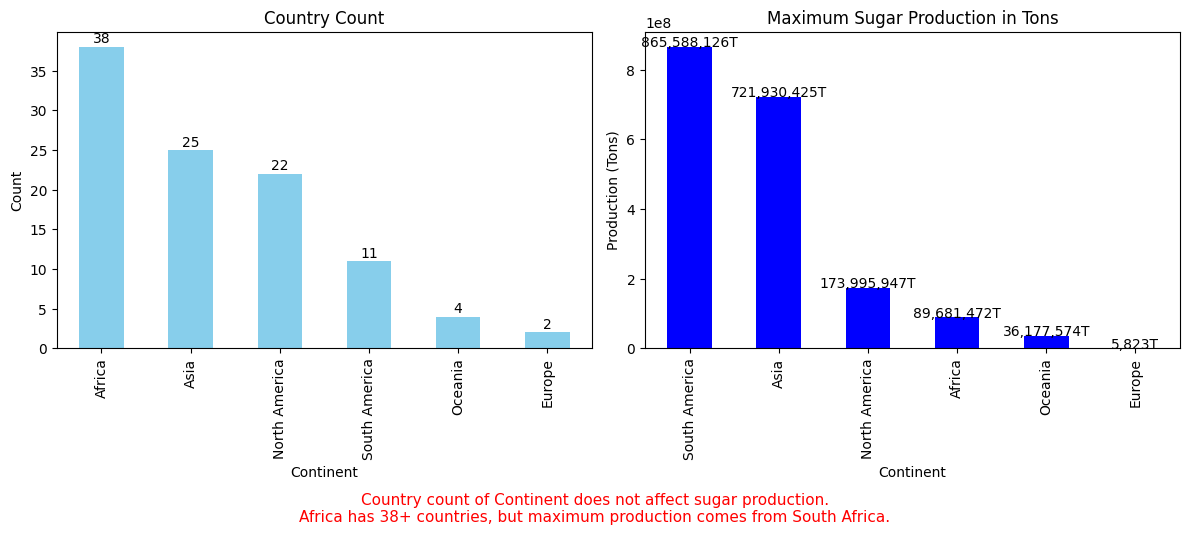

In [63]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


bx = df["Continent"].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Country Count")
axes[0].set_xlabel("Continent")
axes[0].set_ylabel("Count")

for j in bx.patches:
    height = j.get_height()
    bx.text(
        j.get_x() + j.get_width() / 2,
        height + 0.5,
        f"{height:.0f}",
        ha='center',
        fontsize=10
    )


ax = sorted["Production(Tons)"].plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title("Maximum Sugar Production in Tons")
axes[1].set_xlabel("Continent")
axes[1].set_ylabel("Production (Tons)")

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,
        height + 0.5,
        f"{height:,.0f}T",
        ha='center',
        fontsize=10
    )

plt.figtext(0.5, -0.05, 
    "Country count of Continent does not affect sugar production.\nAfrica has 38+ countries, but maximum production comes from South Africa.",
    wrap=True, horizontalalignment='center', fontsize=11,color="red")

plt.tight_layout()
plt.show()


In [64]:
x

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [65]:
sorted["Country_Count"]=x

In [66]:
sorted

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Country_Count
Continent,,,,,
South America,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,36177574.0,28593.605,490909.0,162419.1,4
Europe,5823.0,536.000,71.0,131870.9,2


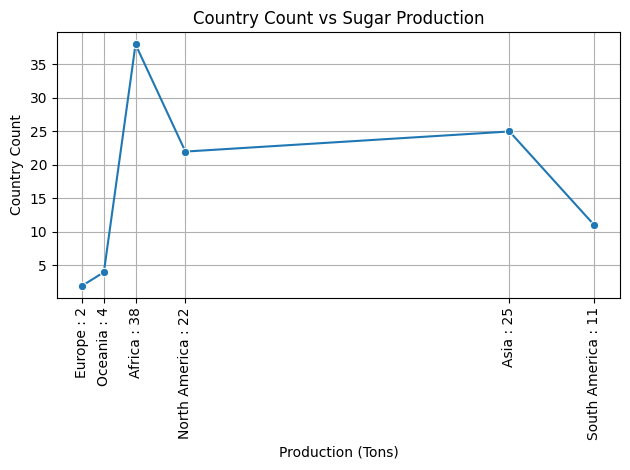

In [67]:

sorted_df = sorted.sort_values("Production(Tons)")

ax = sns.lineplot(data=sorted_df, x="Production(Tons)", y="Country_Count", marker='o')

contlist=[f"{country} : {count}" for country,count in zip(sorted.index ,sorted["Country_Count"])]
plt.xticks(ticks=sorted["Production(Tons)"],labels=contlist,rotation=90)

plt.title("Country Count vs Sugar Production")
plt.xlabel("Production (Tons)")
plt.ylabel("Country Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion
Key takeaways from the analysis:

1. Brazil is the top producer with highest acreage and output

2. Guatemala demonstrates optimal yield efficiency

3. South America dominates despite fewer countries

4. Land area is a better predictor of production than yield efficiency

These insights are valuable for optimizing land use, targeting yield improvements, and guiding policy for sustainable agriculture.